In [197]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import textwrap as tw
import matplotlib.pyplot as plt
import matplotlib as mpl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


## Research Questions

* How many games were won by Blue?
* How many games were won by Red?
* On average, how many wards were placed in total?
* On average, how many wards were destroyed in total?
* On average, how many kills were done per team?
* On average, how many kills were done per player per team?
* On average, how many deaths were recorded per team?
* On average, how many times does each player die per team?
* On average, how many assists were done per team?
* On average, how many assists were done per player per team? 
* Is placing more wards than your opponent related to winning the game?
* Is destroying more wards related to winning the game?
* Is getting the first blood related to winning the game?
* Is getting more kills related to winning the game?
* Is getting more deaths related to winning the game?
* Is getting more assists related to winning the game?
* Is killing more dragon related to winning the game?
* Is killing more heralds related to winning the game?
* Is destroying more towers lead to winning the game?
* Is getting gold and getting high gold difference related to winning?
* Is getting high GoldPerMin related to winning?
* Is having a high avg level difference related to winning?
* Is having a high experience related to winning?
* Is killing more total minions related to winning the game?
* Is killing more total jungle minions related to winning the game?


In [198]:
df = pd.read_csv("/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

## Data Preparation

In [199]:
## Checking for null values and incorrect data types.

df.info()

## no significant null values can be found.
## all data types found are usable.

In [200]:
## Describing quick statistics for relevant columns.

df.describe()

In [201]:
## Editing values for some columns.


## Turning binary numbers to truth values for readability.
df["blueWins"] = df["blueWins"].replace({
    1:True,
    0:False
})

## Creating a new column for readability.
df["winner"] = df["blueWins"].apply(lambda x: "Blue" if x == True else "Red")

In [202]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,winner
0,4519157822,False,28,2,1,9,6,11,0,0,...,16567,6.8,17047,197,55,-643,8,19.7,1656.7,Red
1,4523371949,False,12,1,0,5,5,5,0,0,...,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,Red
2,4521474530,False,15,0,0,7,11,4,1,1,...,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,Red
3,4524384067,False,43,1,0,4,5,5,1,0,...,16478,7.0,17961,235,47,1321,7,23.5,1647.8,Red
4,4436033771,False,75,4,0,6,6,6,0,0,...,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,Red
5,4475365709,True,18,0,0,5,3,6,1,1,...,15201,7.0,18060,221,59,-698,-101,22.1,1520.1,Blue
6,4493010632,True,18,3,1,7,6,7,1,1,...,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3,Blue
7,4496759358,False,16,2,0,5,13,3,0,0,...,17920,6.6,16938,157,54,2615,800,15.7,1792.0,Red
8,4443048030,False,16,3,0,7,7,8,0,0,...,18380,7.2,19298,240,53,1979,771,24.0,1838.0,Red
9,4509433346,True,13,1,1,4,5,5,1,1,...,16605,6.8,18379,247,43,1548,1574,24.7,1660.5,Blue


## Data Analysis and Visualization

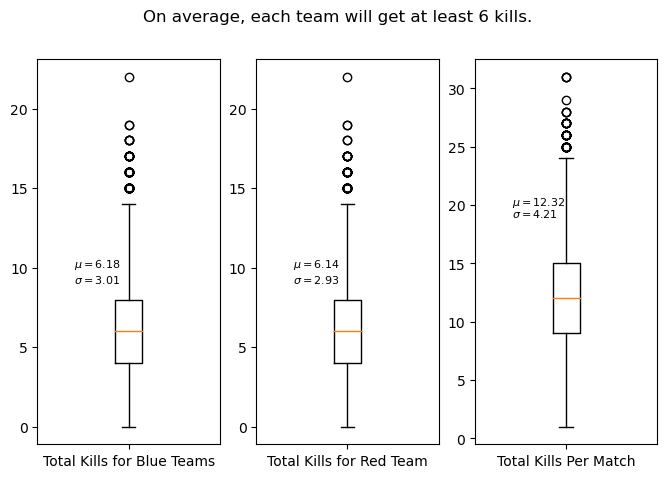

In [203]:
## Plotting the kills per games.

data = df[["blueKills","redKills"]]
data = data.copy()
data["totalKills"] = df["blueKills"] + df["redKills"]

fig,(ax, ax1, ax2) = plt.subplots(1,3,figsize=(8,5))
ax.boxplot(data["blueKills"],labels=["Total Kills for Blue Teams"])
ax.text(0.70, 10,f'$\mu={round(data["blueKills"].mean(),2)}$',fontsize=8)
ax.text(0.70,9,f'$\sigma={round(data["blueKills"].std(),2)}$',fontsize=8)

ax1.boxplot(data["redKills"],labels=["Total Kills for Red Team"])
ax1.text(0.70, 10,f'$\mu={round(data["redKills"].mean(),2)}$',fontsize=8)
ax1.text(0.70,9,f'$\sigma={round(data["redKills"].std(),2)}$',fontsize=8)

ax2.boxplot(data["totalKills"],labels=["Total Kills Per Match"])
ax2.text(0.70, 20,f'$\mu={round(data["totalKills"].mean(),2)}$',fontsize=8)
ax2.text(0.70,19,f'$\sigma={round(data["totalKills"].std(),2)}$',fontsize=8)

fig.suptitle("On average, each team will get at least 6 kills.")

plt.show()

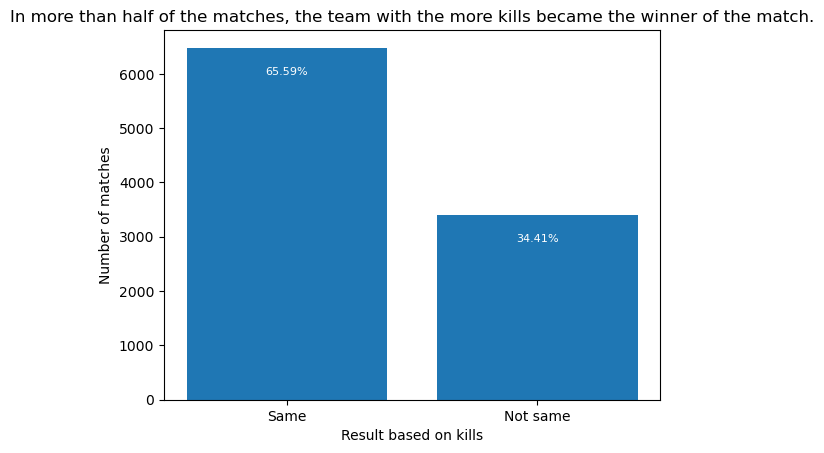

In [204]:
## Relationship between getting more kills and winning.

data = df[["blueKills","redKills","winner"]]
data = data.copy()
data.loc[:,"moreKills"] = np.where(data["blueKills"]>data["redKills"],"Blue",
                                  np.where(data["redKills"]>data["blueKills"],"Red","Equal"))
data.loc[:,"result"] = np.where(data["winner"]==data["moreKills"],"Same","Not same")

data_x = data["result"].value_counts().index
data_y = data["result"].value_counts().values

fig,ax = plt.subplots()
ax.bar(data_x,data_y)

data_same_percent = data["result"].loc[data["result"] == "Same"].count()/data["result"].count()
data_notsame_percent = data["result"].loc[data["result"] == "Not same"].count()/data["result"].count()

ax.text(0,data_y[0]-500,str(round(data_same_percent*100,2))+"%",ha="center",fontsize=8,color="white")
ax.text(1,data_y[1]-500,str(round(data_notsame_percent*100,2))+"%",ha="center",fontsize=8,color="white")

ax.set_title("In more than half of the matches, the team with the more kills became the winner of the match.")
ax.set_ylabel("Number of matches")
ax.set_xlabel("Result based on kills")

plt.show()

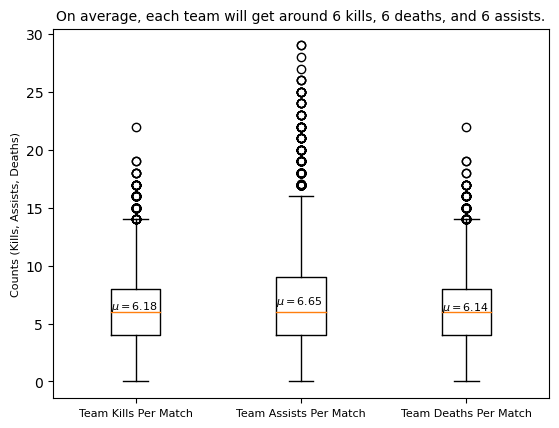

In [205]:
## Plotting total kills, assists, and deaths per team per match.

data = df[["blueKills","blueAssists","blueDeaths","redKills","redAssists","redDeaths"]]
data = data.copy()
data.loc[:,"teamKillsPerMatch"] = data["blueKills"] + data["redKills"]/data["blueKills"].count()
data.loc[:,"teamAssistsPerMatch"] = data["blueAssists"] + data["redAssists"]/data["blueAssists"].count()
data.loc[:,"teamDeathsPerMatch"] = data["blueDeaths"] + data["redDeaths"]/data["blueDeaths"].count()

fig,ax = plt.subplots()

ax.boxplot([data["teamKillsPerMatch"],data["teamAssistsPerMatch"],data["teamDeathsPerMatch"]],labels=["Team Kills Per Match","Team Assists Per Match","Team Deaths Per Match"])

ax.text(0.85,data["teamKillsPerMatch"].mean(),f'$\mu = {str(round(data["teamKillsPerMatch"].mean(),2))}$',fontsize=8)
ax.text(1.85,data["teamAssistsPerMatch"].mean(),f'$\mu = {str(round(data["teamAssistsPerMatch"].mean(),2))}$',fontsize=8)
ax.text(2.85,data["teamDeathsPerMatch"].mean(),f'$\mu = {str(round(data["teamDeathsPerMatch"].mean(),2))}$',fontsize=8)

ax.set_title("On average, each team will get around 6 kills, 6 deaths, and 6 assists.",fontsize=10)
ax.tick_params(labelsize=8,axis="x")
ax.set_ylabel("Counts (Kills, Assists, Deaths)", fontsize=8)

plt.show()

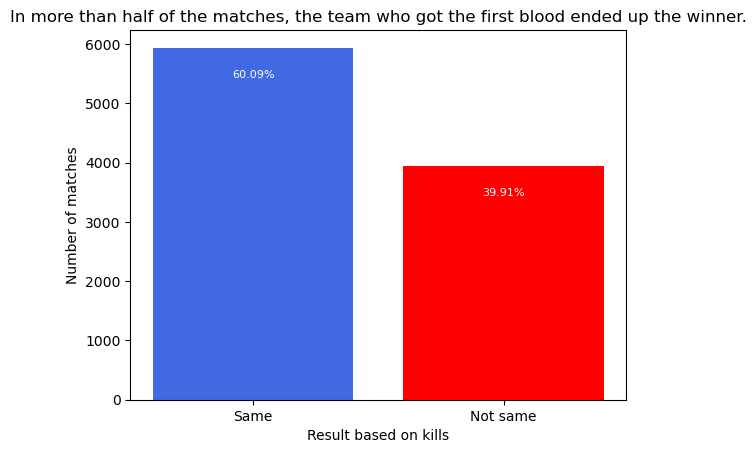

In [206]:
## Relationship between getting the first blood and winning the game.

data = df[["blueFirstBlood","redFirstBlood","winner"]]
data = data.copy()
data.loc[:,"firstBlood"] = np.where(data["blueFirstBlood"] == 1,"Blue","Red")
data.loc[:,"result"] = np.where(data["winner"] == data["firstBlood"],"Same","Not same")

data_x = data["result"].value_counts().index
data_y = data["result"].value_counts().values

fig, ax = plt.subplots()

ax.bar(data_x,data_y,color=["royalblue","red"])

data_same_percent = data["result"].loc[data["result"] == "Same"].count()/data["result"].count()
data_notsame_percent = data["result"].loc[data["result"] == "Not same"].count()/data["result"].count()

ax.text(0,data_y[0]-500,str(round(data_same_percent*100,2))+"%",ha="center",fontsize=8,color="white")
ax.text(1,data_y[1]-500,str(round(data_notsame_percent*100,2))+"%",ha="center",fontsize=8,color="white")
ax.set_title("In more than half of the matches, the team who got the first blood ended up the winner.")
ax.set_ylabel("Number of matches")
ax.set_xlabel("Result based on kills")


plt.show()

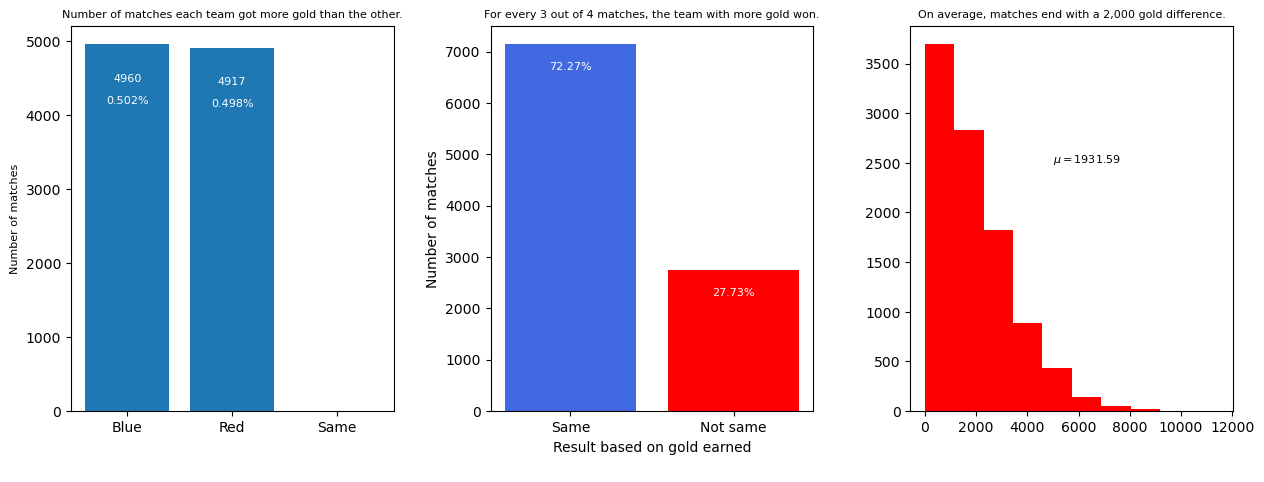

In [207]:
data = df[["blueTotalGold","redTotalGold","winner","blueGoldDiff"]]
data = data.copy()
data.loc[:,"moreGold"] = np.where(data["blueTotalGold"] > data["redTotalGold"],"Blue",
                                 np.where(data["redTotalGold"] > data["blueTotalGold"],"Red","Same"))
data.loc[:,"result"] = np.where(data["moreGold"] == data["winner"],"Same","Not same")
data["blueGoldDiff"] = data["blueGoldDiff"].apply(lambda x: abs(x))


fig,(ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,5))

data_x = data["moreGold"].value_counts().index
data_y = data["moreGold"].value_counts().values
ax.bar(data_x,data_y)
for i,v in enumerate(data_y):
    ax.text(i,v-500,str(v),ha="center",fontsize=8,color="white")
    ax.text(i,v-800,str(round(v/data["moreGold"].count(),3))+"%",ha="center",fontsize=8,color="white")
ax.set_title("Number of matches each team got more gold than the other.",fontsize=8)
ax.set_ylabel("Number of matches",fontsize=8)


data_x = data["result"].value_counts().index
data_y = data["result"].value_counts().values

ax1.bar(data_x,data_y,color=["royalblue","red"])

data_same_percent = data["result"].loc[data["result"] == "Same"].count()/data["result"].count()
data_notsame_percent = data["result"].loc[data["result"] == "Not same"].count()/data["result"].count()

ax1.text(0,data_y[0]-500,str(round(data_same_percent*100,2))+"%",ha="center",fontsize=8,color="white")
ax1.text(1,data_y[1]-500,str(round(data_notsame_percent*100,2))+"%",ha="center",fontsize=8,color="white")
ax1.set_title("For every 3 out of 4 matches, the team with more gold won.",fontsize=8)
ax1.set_ylabel("Number of matches")
ax1.set_xlabel("Result based on gold earned")

ax2.hist(data["blueGoldDiff"],color="red")
ax2.text(5000,2500,f'$\mu = {str(round(data["blueGoldDiff"].mean(),2))}$',fontsize=8)
ax2.set_title("On average, matches end with a 2,000 gold difference.",fontsize=8)

fig.subplots_adjust(wspace=0.3,hspace=0.4)

plt.show()


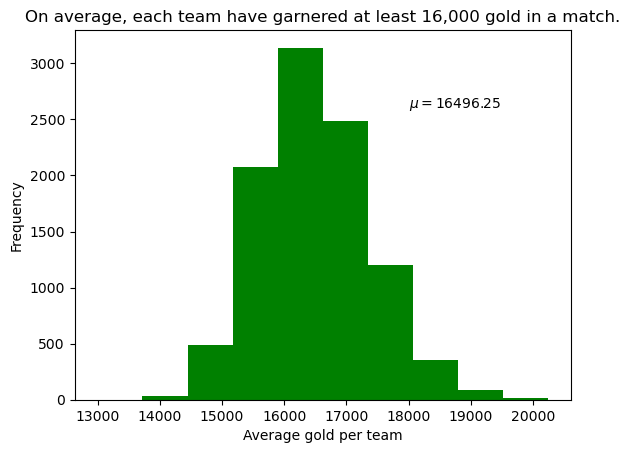

In [208]:
## Plotting the gold earned per game per team.

data = df[["gameId","blueTotalGold","redTotalGold"]]
data = data.copy()
data.loc[:,"goldPerTeam"] = (data["blueTotalGold"] + data["redTotalGold"])/2
data = data.sort_values(by="gameId",ascending=True)
fig,ax = plt.subplots()
ax.hist(data["goldPerTeam"],color="green",bins=10)
ax.text(18_000,2600,f'$\mu={round(data["goldPerTeam"].mean(),2)}$')
ax.set_title("On average, each team have garnered at least 16,000 gold in a match.")
ax.set_xlabel("Average gold per team")
ax.set_ylabel("Frequency")

fig.show()

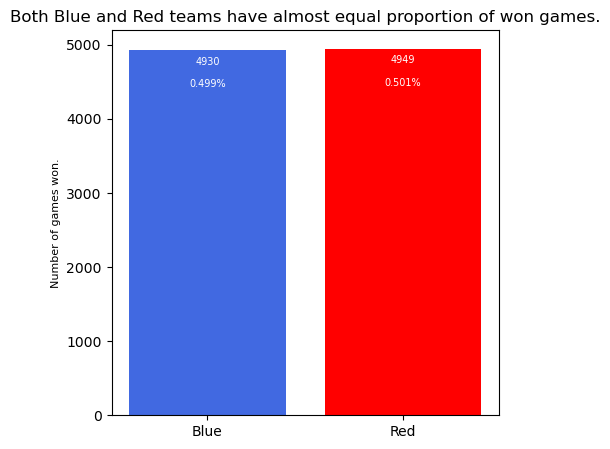

In [210]:
## How many games were won by blue teams and red teams.

data = df.groupby("winner").agg("count")["gameId"]
data = data.reset_index()
data = data[["winner","gameId"]]

fig,ax = plt.subplots(figsize=(5,5))

maxval = data["gameId"].max()
ax.bar(data["winner"],data["gameId"],color=["red" if val == maxval else "royalblue" for val in data["gameId"]])

for i,v in enumerate(data["gameId"]):
    ax.text(i,v-200,str(v),ha="center",fontsize=7,color="white")
    ax.text(i,v-500,f'{str(round(v/data["gameId"].sum(),3))}'+"%",ha="center",fontsize=7,color="white")
ax.set_title("Both Blue and Red teams have almost equal proportion of won games.")
ax.set_ylabel("Number of games won.",fontsize=8)
    
plt.show()

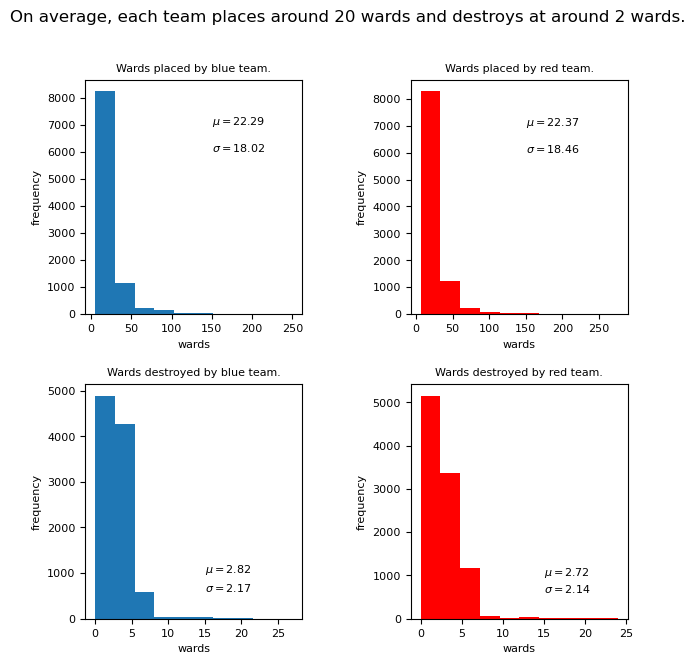

In [211]:
## Plotting statistics relating to Wards

data = df[["blueWardsPlaced","blueWardsDestroyed","redWardsPlaced","redWardsDestroyed"]]

fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2,figsize=(7,7))

ax.hist(data["blueWardsPlaced"])
ax.set_xlabel("wards",fontsize=8)
ax.set_ylabel("frequency",fontsize=8)
ax.tick_params(axis="x",labelsize=8)
ax.tick_params(axis="y",labelsize=8)
ax.set_title("Wards placed by blue team.",fontsize=8)
ax.text(150,7000,f'$\mu={round(data["blueWardsPlaced"].mean(),2)}$',fontsize=8)
ax.text(150,6000,f'$\sigma={round(data["blueWardsPlaced"].std(),2)}$',fontsize=8)

ax1.hist(data["redWardsPlaced"],color="red")
ax1.set_xlabel("wards",fontsize=8)
ax1.set_ylabel("frequency",fontsize=8)
ax1.tick_params(axis="x",labelsize=8)
ax1.tick_params(axis="y",labelsize=8)
ax1.set_title("Wards placed by red team.",fontsize=8)
ax1.text(150,7000,f'$\mu={round(data["redWardsPlaced"].mean(),2)}$',fontsize=8)
ax1.text(150,6000,f'$\sigma={round(data["redWardsPlaced"].std(),2)}$',fontsize=8)

ax2.hist(data["blueWardsDestroyed"])
ax2.set_xlabel("wards",fontsize=8)
ax2.set_ylabel("frequency",fontsize=8)
ax2.tick_params(axis="x",labelsize=8)
ax2.tick_params(axis="y",labelsize=8)
ax2.set_title("Wards destroyed by blue team.",fontsize=8)
ax2.text(15,1000,f'$\mu={round(data["blueWardsDestroyed"].mean(),2)}$',fontsize=8)
ax2.text(15,600,f'$\sigma={round(data["blueWardsDestroyed"].std(),2)}$',fontsize=8)

ax3.hist(data["redWardsDestroyed"],color="red")
ax3.set_xlabel("wards",fontsize=8)
ax3.set_ylabel("frequency",fontsize=8)
ax3.tick_params(axis="x",labelsize=8)
ax3.tick_params(axis="y",labelsize=8)
ax3.set_title("Wards destroyed by red team.",fontsize=8)
ax3.text(15,1000,f'$\mu={round(data["redWardsDestroyed"].mean(),2)}$',fontsize=8)
ax3.text(15,600,f'$\sigma={round(data["redWardsDestroyed"].std(),2)}$',fontsize=8)

fig.subplots_adjust(wspace=0.5,hspace=0.3)

fig.suptitle("On average, each team places around 20 wards and destroys at around 2 wards.")

plt.show()

In [228]:
data = df[["blueDragons","blueHeralds","redDragons","redHeralds","winner"]]
data = data.copy()
data.loc[:,"moreDragonsKilled"] = np.where(data["blueDragons"] > data["redDragons"],"Blue",
                                          np.where(data["redDragons"] > data["blueDragons"],"Red","Same"))
data.loc[:,"moreHeraldsKilled"] = np.where(data["blueHeralds"] > data["redHeralds"],"Blue",
                                          np.where(data["redHeralds"] > data["blueHeralds"],"Red","Same"))
data

TypeError: unsupported operand type(s) for /: 'str' and 'int'

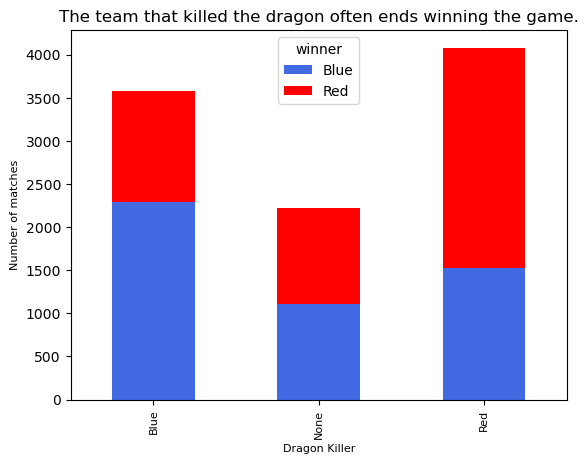

In [265]:
## Relationship between killing the dragons and winning.

data = df[["blueDragons","blueHeralds","redDragons","redHeralds","winner"]]
data = data.copy()
data.loc[:,"dragonKiller"] = np.where(data["blueDragons"] == 1, "Blue",
                                     np.where(data["redDragons"] == 1, "Red","None"))
cross_tab = pd.crosstab(data["dragonKiller"],data["winner"])

fig,ax = plt.subplots()
cross_tab.plot(kind="bar",stacked=True,ax=ax,color=["royalblue","red"])
ax.set_xlabel("Dragon Killer",fontsize=8)
ax.set_ylabel("Number of matches",fontsize=8)
ax.set_title("The team that killed the dragon often ends winning the game.")
ax.tick_params(axis="x",labelsize=8)

plt.show()

In [237]:
df["redDragons"].value_counts()


0    5798
1    4081
Name: redDragons, dtype: int64

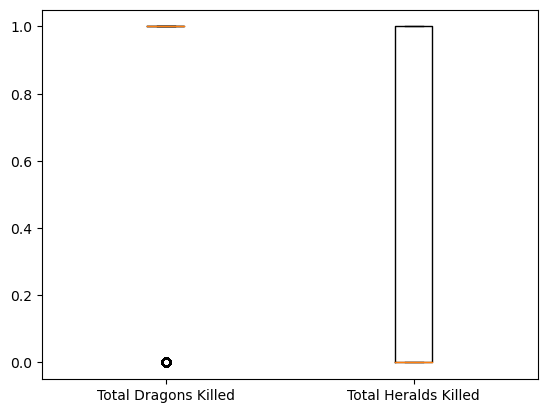

In [222]:
data = df[["blueDragons","blueHeralds","redDragons","redHeralds"]]
data = data.copy()
data.loc[:,"totalDragonsKilled"] = data["blueDragons"] + data["redDragons"]
data.loc[:,"totalHeraldsKilled"] = data["blueHeralds"] + data["redHeralds"]
data.loc[:,"dragonsKilledPerTeam"] = data["totalDragonsKilled"]/2
data.loc[:,"heraldsKilledPerTeam"] = data["totalHeraldsKilled"]/2
data

fig,ax = plt.subplots()

ax.boxplot([data["totalDragonsKilled"],data["totalHeraldsKilled"]],labels=["Total Dragons Killed","Total Heralds Killed"])

plt.show()

In [213]:
df.head(1)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,winner
0,4519157822,False,28,2,1,9,6,11,0,0,...,16567,6.8,17047,197,55,-643,8,19.7,1656.7,Red
